In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Yeast Dataset 

In [2]:
train_path = '../datasets/yeast/yeast-train.arff'
test_path = '../datasets/yeast/yeast-test.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 917/917 [00:00<00:00, 9152.51it/s]

Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)
Test data shape:  (917, 1, 618)
Test labels shape:  (917, 14)


### CIFDM Mode

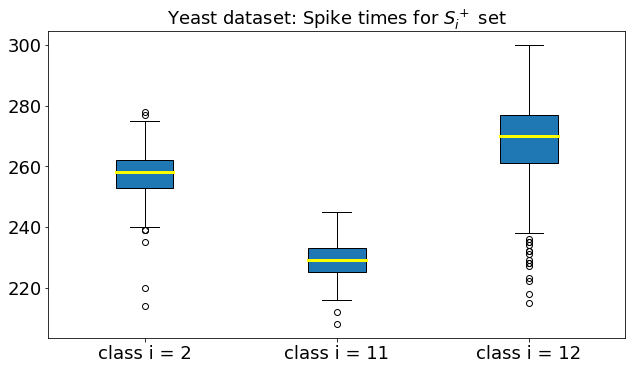

In [3]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': [500, 500, 500], 'labels': [7, 3, 3]},
    'seed': 5,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': './checkpoints/yeast/Yeast_5_cifdm.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[2, 12])
net.plot_spike_patterns(train_spikes, net_ids=[2, 11, 12,])

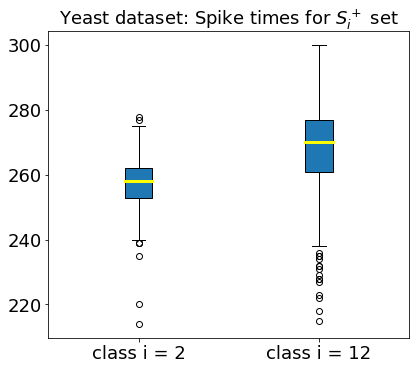

In [4]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[2, 12])

### DSLL Mode

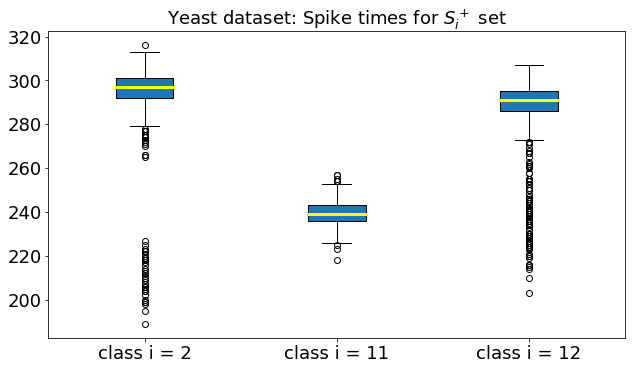

In [5]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 100,
    'print_every': 10,
    'name': 'Yeast',
    'tasks': {'samples': None, 'labels': [7, 3, 3]},
    'seed': 5,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': './checkpoints/yeast/Yeast_5_dsll.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[2, 12])
net.plot_spike_patterns(train_spikes, net_ids=[2, 11, 12])

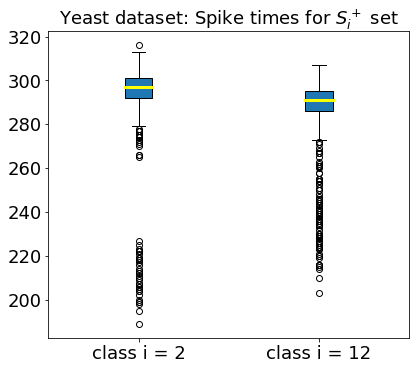

In [6]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[2, 12])

## FoodTruck Dataset

In [7]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 250/250 [00:00<00:00, 7982.52it/s]

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)
Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


### CIFDM Mode

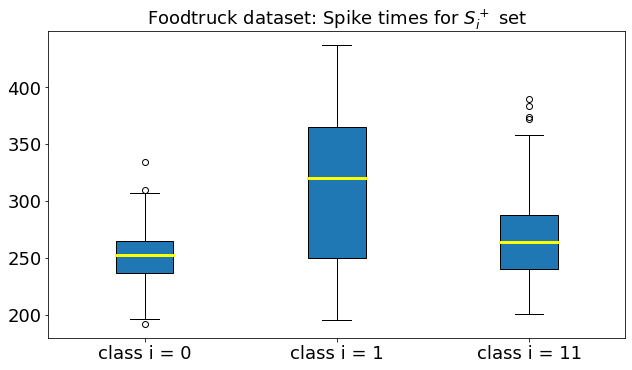

In [8]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': [90, 80, 80], 'labels': [4, 4, 4]},
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': './checkpoints/foodtruck/Foodtruck_2_cifdm.pkl',
    'device': torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[0, 11])
net.plot_spike_patterns(train_spikes, net_ids=[0, 1, 11])

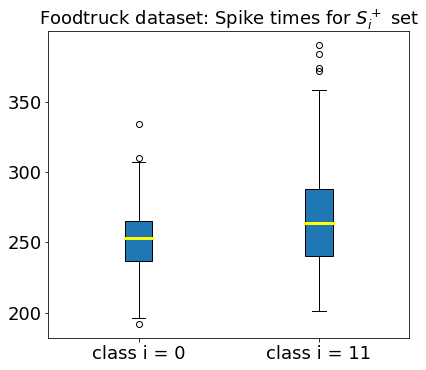

In [9]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 11])

### DSLL Mode

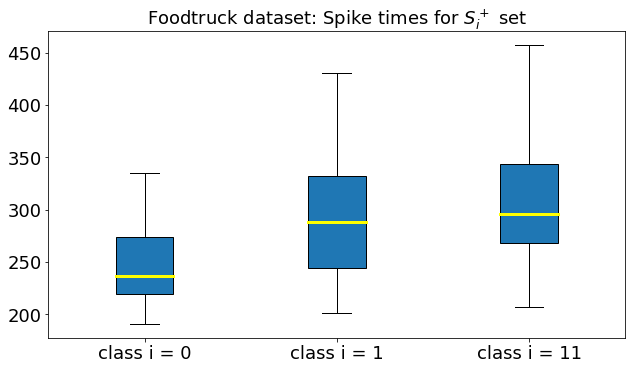

In [10]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': None, 'labels': [4, 4, 4]},
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': './checkpoints/foodtruck/Foodtruck_2_dsll.pkl',
    'device': torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[0, 11])
net.plot_spike_patterns(train_spikes, net_ids=[0, 1, 11])

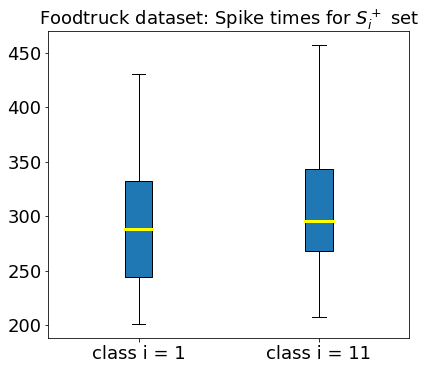

In [11]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[1, 11])

## Flags Dataset

In [12]:
train_path = '../datasets/flags/flags-train.arff'
test_path = '../datasets/flags/flags-test.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", train_labels.shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", test_labels.shape)

100%|██████████| 65/65 [00:00<00:00, 8738.13it/s]

Train data shape:  (129, 1, 114)
Train labels shape:  (129, 7)
Test data shape:  (65, 1, 114)
Test labels shape:  (65, 7)


### CIFDM Mode

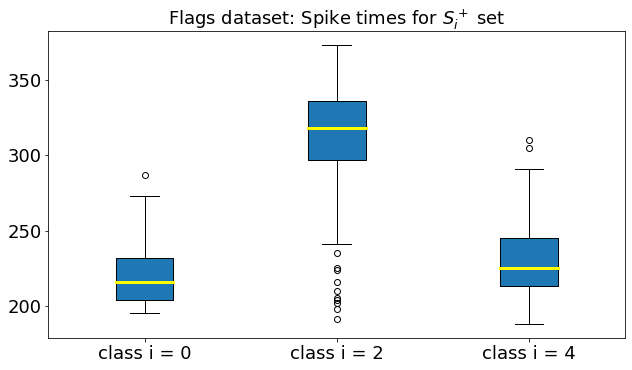

In [13]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': [43, 43, 43], 'labels': [3, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': './checkpoints/flags/Flags_2_cifdm.pkl',
    'device': torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[0, 4])
net.plot_spike_patterns(train_spikes, net_ids=[0, 2, 4])

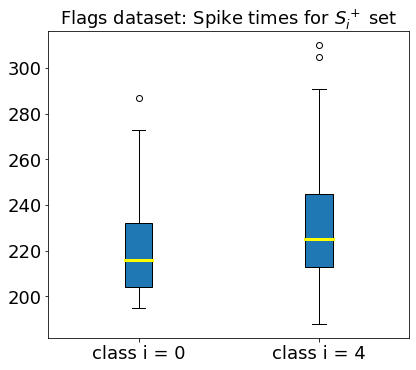

In [14]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 4])

### DSLL Mode

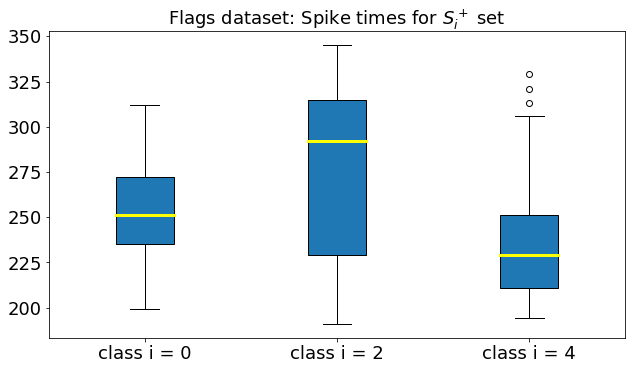

In [15]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': None, 'labels': [3, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': './checkpoints/flags/Flags_2_dsll.pkl',
    'device': torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
}
net = OverallSNN(hparams_dict)
# net.plot_spike_patterns(test_spikes, net_ids=[0, 4])
net.plot_spike_patterns(train_spikes, net_ids=[0, 2, 4])

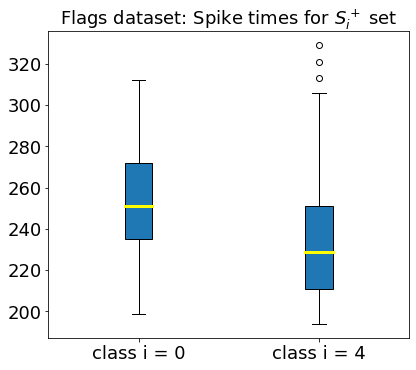

In [16]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 4])

## Multi-Label Case

In [17]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Flags dataset

In [18]:
train_path = '../datasets/flags/flags-train.arff'
test_path = '../datasets/flags/flags-test.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 65/65 [00:00<00:00, 8913.84it/s]

Train data shape:  (129, 1, 114)
Train labels shape:  (129, 7)
Test data shape:  (65, 1, 114)
Test labels shape:  (65, 7)


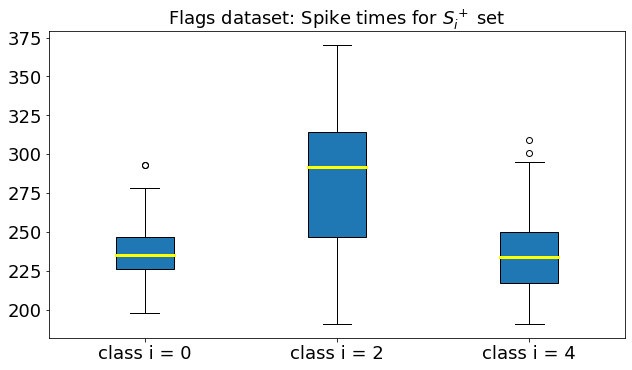

In [19]:
hparams_dict = {
    'name': 'Flags',
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4500,
    'print_every': 450,
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': './checkpoints/flags/best_f1_model0.0001_4500.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 2, 4])

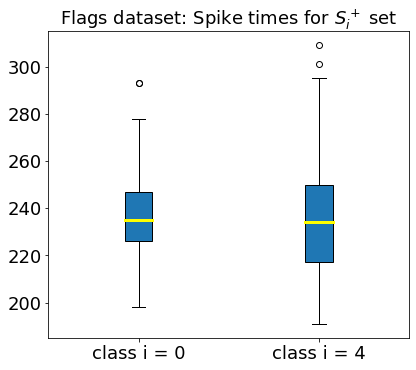

In [20]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 4])

### Yeast dataset

In [21]:
train_path = '../datasets/yeast/yeast-train.arff'
test_path = '../datasets/yeast/yeast-test.arff'
num_features = 103
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 917/917 [00:00<00:00, 9011.18it/s]

Train data shape:  (1500, 1, 618)
Train labels shape:  (1500, 14)
Test data shape:  (917, 1, 618)
Test labels shape:  (917, 14)


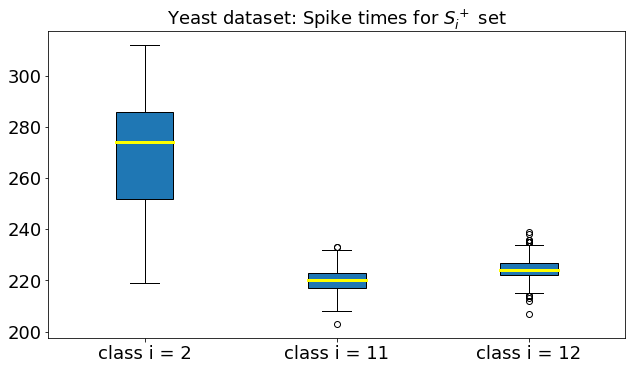

In [22]:
hparams_dict = {
    'inputs': 618,
    'outputs': 13,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-3,
    'sim_time': 600,
    'n_epochs': 1000,
    'print_every': 200,
    'seed': 2,
    'ckpt_dir': './checkpoints/yeast',
    'load_from_file': './checkpoints/yeast/best_f1_model0.005_1000.pkl',
    'device': device,
    'name': 'Yeast'
}
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[2, 11, 12])

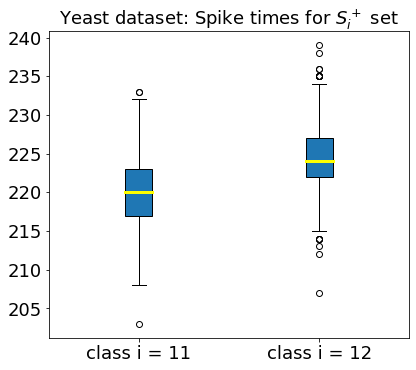

In [23]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[11, 12])

### FoodTruck Dataset

In [24]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 250/250 [00:00<00:00, 8221.09it/s]

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)
Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


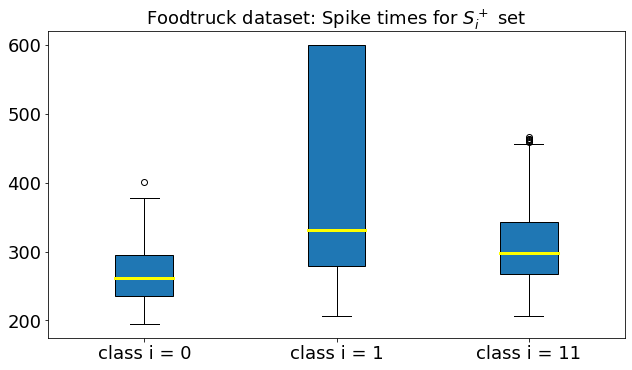

In [25]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': './checkpoints/foodtruck/best_f1_model0.0005_5000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 1, 11])

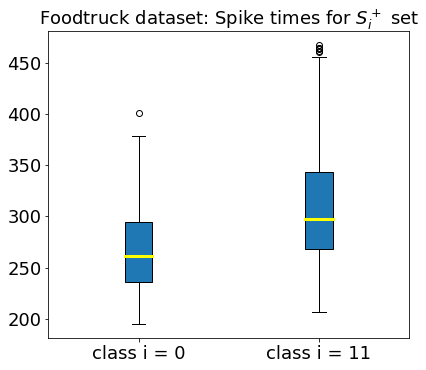

In [26]:
net = OverallSNN(hparams_dict)
net.plot_spike_patterns(train_spikes, net_ids=[0, 11])